## Model: Logistic Regression

importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

loading the dataset

In [2]:
df = pd.read_csv("Cleaned_SLU_Opportunity_Wise_Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8246 non-null   object
 1   Opportunity Id           8246 non-null   object
 2   Opportunity Name         8246 non-null   object
 3   Opportunity Category     8246 non-null   object
 4   Opportunity End Date     8246 non-null   object
 5   First Name               8246 non-null   object
 6   Date of Birth            8246 non-null   object
 7   Gender                   8246 non-null   object
 8   Country                  8246 non-null   object
 9   Institution Name         8246 non-null   object
 10  Current/Intended Major   8246 non-null   object
 11  Entry created at         8246 non-null   object
 12  Status Description       8246 non-null   object
 13  Status Code              8246 non-null   int64 
 14  Apply Date               8246 non-null  

Full Unique Value Inspection

In [4]:
# Loop through all columns and print unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values count: {len(unique_vals)}")
    print(f"Sample values: {unique_vals[:10]}")  # show first 10 unique values for brevity
    print("-" * 50)

Column: Learner SignUp DateTime
Unique values count: 3805
Sample values: ['2023-06-14 12:30:35' '2023-05-01 05:29:16' '2023-04-09 20:35:08'
 '2023-08-29 05:20:03' '2023-01-06 15:26:36' '2024-03-02 19:16:07'
 '2023-05-31 07:11:04' '2023-07-22 07:30:25' '2023-03-20 16:36:30'
 '2023-05-11 03:40:33']
--------------------------------------------------
Column: Opportunity Id
Unique values count: 23
Sample values: ['00000000-0GN2-A0AY-7XK8-C5FZPP' '00000000-0GHG-N3NG-584M-44MK40'
 '00000000-0GNT-FT74-MZT8-93VC0G' '00000000-0GRA-BD28-CXVV-EYEX21'
 '00000000-0GZY-NNHV-FJWW-PTA9VX' '00000000-0GHB-4N83-QX9K-JM48K2'
 '00000000-0GWQ-AXC5-X45C-2MHJ28' '00000000-10WC-BS50-CYGD-X97ES4'
 '00000000-104G-3FS6-3SV3-JKHVQB' '00000000-10WW-X340-GTVH-RR52VF']
--------------------------------------------------
Column: Opportunity Name
Unique values count: 22
Sample values: ['Career Essentials: Getting Started With Your Professional Journey'
 'Slide Geeks: A Presentation Design Competition' 'Digital Marketing'

Step 1: Define Target Variable

In [5]:
# Create binary target: 1 = Completed (Rewards Award), 0 = Not Completed
df['Completed'] = df['Status Description'].apply(lambda x: 1 if x == 'Rewards Award' else 0)


# Performance Prediction Model
Logistic Regression — Module Completion Prediction

Step 1: Feature Engineering

We will create:

Age → from Date of Birth

Gender → one-hot encoding

Country → one-hot encoding (top 10 frequent, rest as “Other”)

Opportunity Category → one-hot encoding

Opportunity Duration → Opportunity End Date - Opportunity Start Date (in days)

Time to Apply → Apply Date - Learner SignUp DateTime (in days)

Step 2: Full Preprocessing Code

In [6]:
# ---------------------
# Step 0: Target Variable
# ---------------------
df['Completed'] = df['Status Description'].apply(lambda x: 1 if x == 'Rewards Award' else 0)

# ---------------------
# Step 1: Age
# ---------------------
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['Age'] = (pd.Timestamp.today() - df['Date of Birth']).dt.days // 365

# ---------------------
# Step 2: Opportunity Duration (days)
# ---------------------
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'], errors='coerce')
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce')
df['Opportunity_Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days

# ---------------------
# Step 3: Time to Apply (days)
# ---------------------
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['Time_to_Apply'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days
df['Time_to_Apply'] = df['Time_to_Apply'].apply(lambda x: x if x >= 0 else 0)  # fix negative or placeholder dates

# ---------------------
# Step 4: Gender Encoding
# ---------------------
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # drop_first avoids dummy variable trap

# ---------------------
# Step 5: Country Encoding (Top 10 + Other)
# ---------------------
top_countries = df['Country'].value_counts().nlargest(10).index
df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# ---------------------
# Step 6: Opportunity Category Encoding
# ---------------------
df = pd.get_dummies(df, columns=['Opportunity Category'], drop_first=True)

# ---------------------
# Step 7: Select final features
# ---------------------
feature_cols = ['Age', 'Opportunity_Duration', 'Time_to_Apply'] + \
               [col for col in df.columns if 'Gender_' in col or 'Country_' in col or 'Opportunity Category_' in col]

X = df[feature_cols]
y = df['Completed']

print("Features prepared for logistic regression:")
print(X.head())
print("Target variable sample:")
print(y.value_counts())

Features prepared for logistic regression:
   Age  Opportunity_Duration  Time_to_Apply  Gender_Male  Gender_Other  \
0   24                   604              0        False         False   
1   25                   604              0        False         False   
2   23                   604              0         True         False   
3   26                   604             41        False         False   
4   25                   604              0         True         False   

   Gender_Prefer Not To Say  Country_Egypt  Country_Ethiopia  Country_Ghana  \
0                     False          False             False          False   
1                     False          False             False          False   
2                     False          False             False          False   
3                     False          False             False          False   
4                     False          False             False          False   

   Country_India  Country_Kenya  Coun

Step 3: What This Code Does

Converts dates safely without dropping rows.

Computes meaningful numeric features: Age, Opportunity_Duration, Time_to_Apply.

One-hot encodes categorical variables (Gender, Country, Opportunity Category) safely.

Selects only useful features for the model.

Target Completed is 1 only for Rewards Award.

Model Training & Performance

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1644
           1       0.00      0.00      0.00         6

    accuracy                           1.00      1650
   macro avg       0.50      0.50      0.50      1650
weighted avg       0.99      1.00      0.99      1650



c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

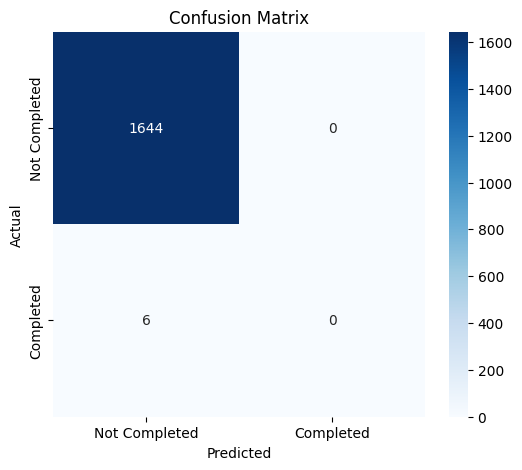

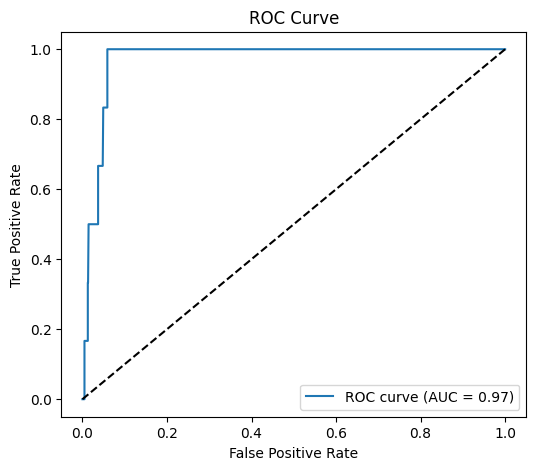

ROC-AUC Score: 0.9706


In [7]:
# ---------------------
# Step 8: Train/Test Split
# ---------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------
# Step 9: Feature Scaling
# ---------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------
# Step 10: Logistic Regression Model
# ---------------------
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# ---------------------
# Step 11: Predictions & Probabilities
# ---------------------
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (Completed)

# ---------------------
# Step 12: Evaluation Metrics
# ---------------------
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed','Completed'], yticklabels=['Not Completed','Completed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")


## We need to handle class imbalance so the model can learn to predict the rare “Completed” cases.

Step 1: Apply Class Weighting

Logistic Regression in sklearn allows class_weight='balanced', which automatically gives more weight to the minority class.

In [8]:
# Logistic Regression with class weighting
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluating the model with metrics and visualizations.

Step 1: Predict Probabilities

In [9]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1

Step 2: Confusion Matrix & Classification Report

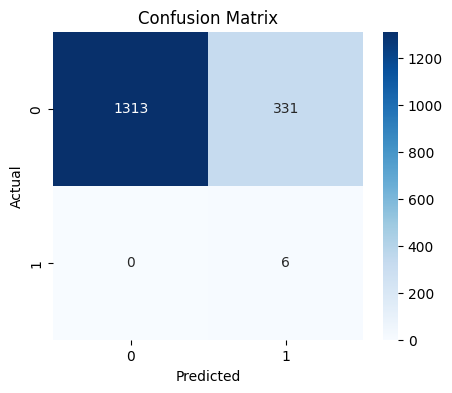

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1644
           1       0.02      1.00      0.03         6

    accuracy                           0.80      1650
   macro avg       0.51      0.90      0.46      1650
weighted avg       1.00      0.80      0.88      1650



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, zero_division=0))


Step 3: ROC Curve & AUC

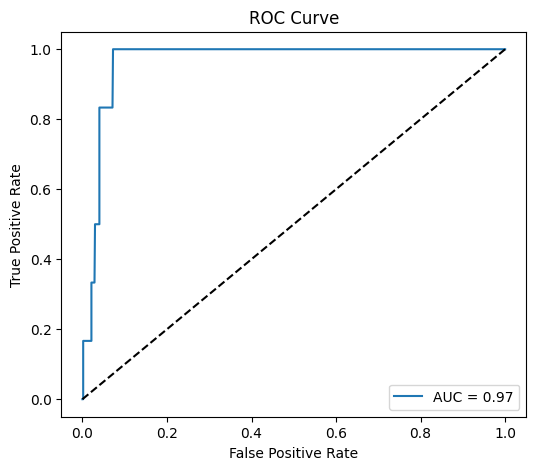

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train_scaled and y_train exist
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
# Use the trained model variable, e.g., model
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Class 1 probabilities


### Visualizations

We'll predict probabilities and create the following visualizations for learner completion patterns:

Probability distribution plot – shows how likely learners are to complete the module.

Funnel chart – highlights potential drop-offs.

Heatmap – shows engagement by key numeric features vs. completion probability.

Progression bar chart – optional, to visualize module-level completion stages.

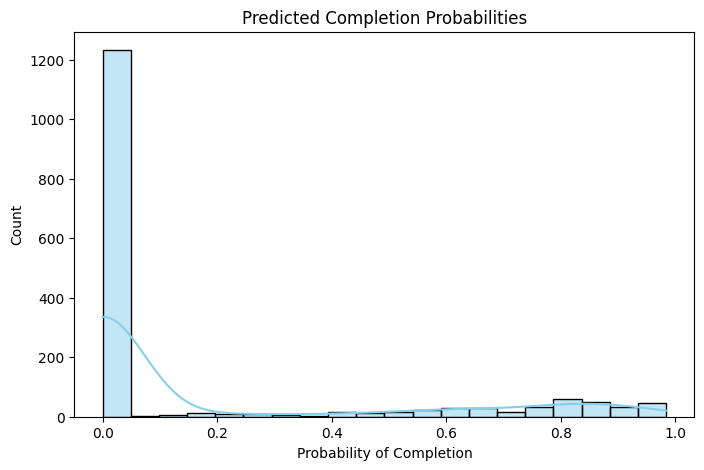

C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\1192653422.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_pred.groupby(prob_bins)['Actual_Completed'].mean().to_frame()


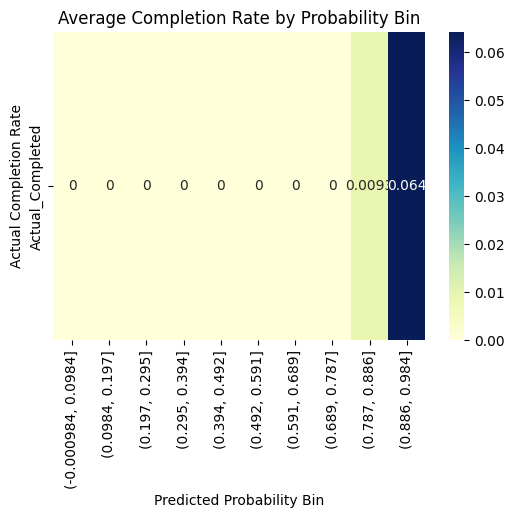

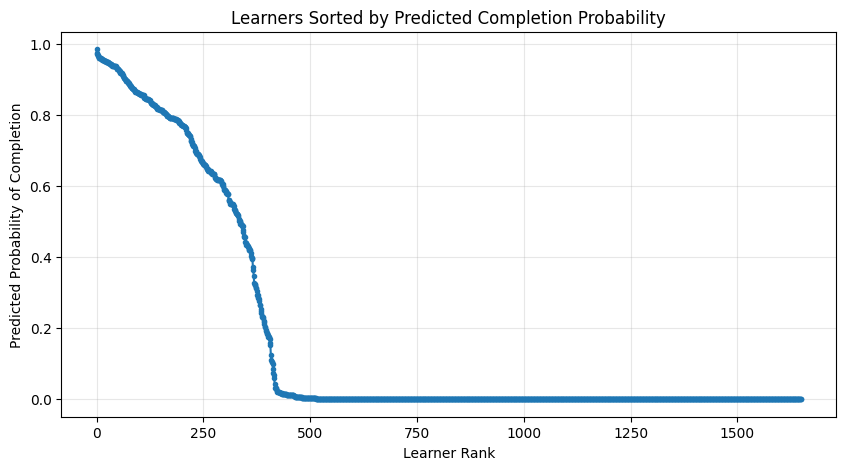

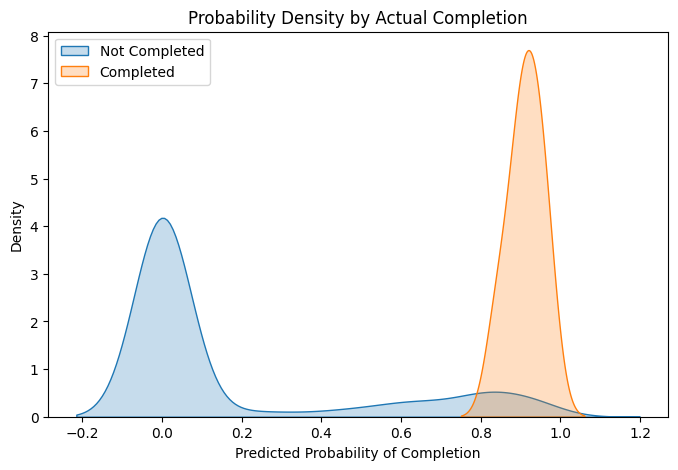

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1: Predict probabilities for Class 1 (Completed) ---
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of completion

# Create a DataFrame with probabilities and actual labels
df_pred = pd.DataFrame({
    'Learner_Completion_Prob': y_probs,
    'Actual_Completed': y_test
})

# --- Step 2: Probability Distribution Plot ---
plt.figure(figsize=(8,5))
sns.histplot(df_pred['Learner_Completion_Prob'], bins=20, kde=True, color='skyblue')
plt.title('Predicted Completion Probabilities')
plt.xlabel('Probability of Completion')
plt.ylabel('Count')
plt.show()

# --- Step 3: Heatmap of probabilities vs actual completion ---
plt.figure(figsize=(6,4))
prob_bins = pd.cut(df_pred['Learner_Completion_Prob'], bins=10)
heatmap_data = df_pred.groupby(prob_bins)['Actual_Completed'].mean().to_frame()
sns.heatmap(heatmap_data.T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Average Completion Rate by Probability Bin')
plt.xlabel('Predicted Probability Bin')
plt.ylabel('Actual Completion Rate')
plt.show()

# --- Step 4: Funnel chart / sorted probabilities for top-risk or top-likely learners ---
df_sorted = df_pred.sort_values('Learner_Completion_Prob', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Learner_Completion_Prob'], marker='o', linestyle='-', markersize=3)
plt.title('Learners Sorted by Predicted Completion Probability')
plt.xlabel('Learner Rank')
plt.ylabel('Predicted Probability of Completion')
plt.grid(True, alpha=0.3)
plt.show()

# --- Step 5: KDE plot grouped by actual completion ---
plt.figure(figsize=(8,5))
sns.kdeplot(df_pred[df_pred['Actual_Completed']==0]['Learner_Completion_Prob'], label='Not Completed', fill=True)
sns.kdeplot(df_pred[df_pred['Actual_Completed']==1]['Learner_Completion_Prob'], label='Completed', fill=True)
plt.title('Probability Density by Actual Completion')
plt.xlabel('Predicted Probability of Completion')
plt.ylabel('Density')
plt.legend()
plt.show()


What these visualizations show:

Histogram – distribution of predicted completion probabilities across all learners.

Heatmap – shows the actual completion rate within probability bins; useful for validation and identifying patterns.

Funnel chart – learners sorted by probability; helps see the top likely-to-complete learners and engagement prioritization.

KDE plot – density distribution of probabilities separated by actual completion status; highlights class separation.

### Additional Visualizations

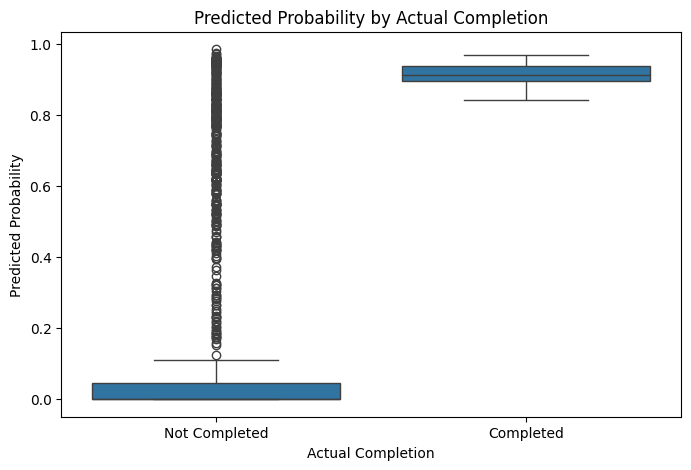

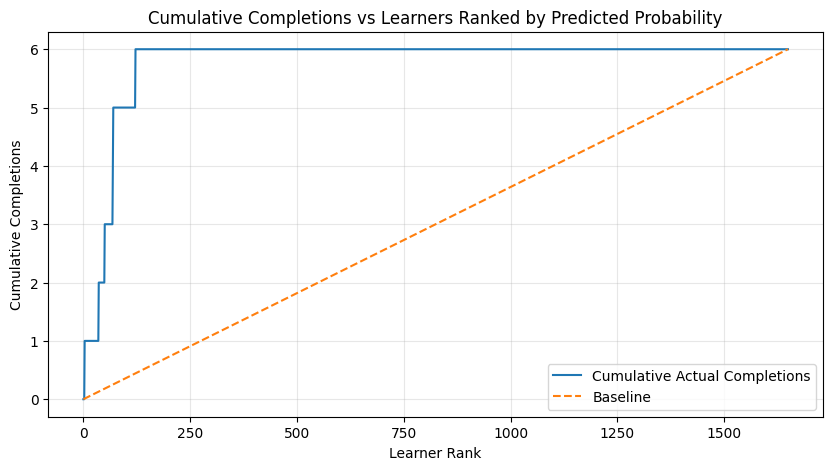

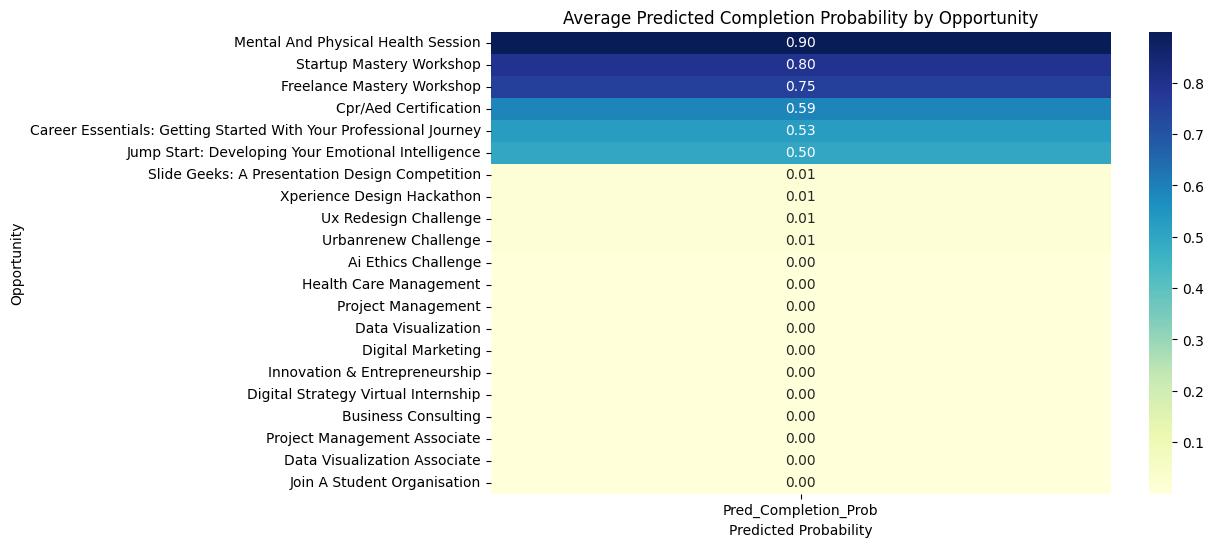

C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\3976480794.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50.index, y='Learner_Completion_Prob', data=top_50, palette='Blues_d')


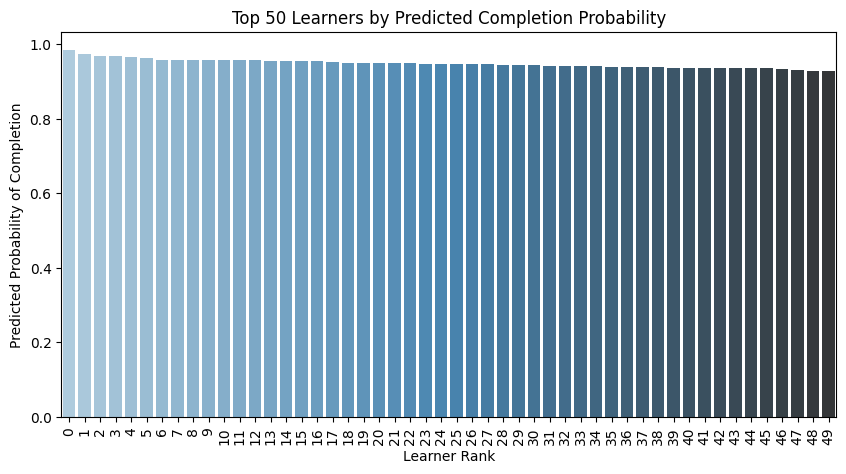

In [15]:
# --- Step 6: Probability vs Status Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Actual_Completed', y='Learner_Completion_Prob', data=df_pred)
plt.xticks([0,1], ['Not Completed','Completed'])
plt.title('Predicted Probability by Actual Completion')
plt.xlabel('Actual Completion')
plt.ylabel('Predicted Probability')
plt.show()

# --- Step 7: Cumulative Gain / Lift Visualization ---
df_pred_sorted = df_pred.sort_values('Learner_Completion_Prob', ascending=False).reset_index(drop=True)
df_pred_sorted['Cumulative_Completed'] = df_pred_sorted['Actual_Completed'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df_pred_sorted['Cumulative_Completed'], label='Cumulative Actual Completions')
plt.plot(np.linspace(0,len(df_pred_sorted)-1,len(df_pred_sorted)), np.linspace(0, df_pred_sorted['Actual_Completed'].sum(), len(df_pred_sorted)), linestyle='--', label='Baseline')
plt.title('Cumulative Completions vs Learners Ranked by Predicted Probability')
plt.xlabel('Learner Rank')
plt.ylabel('Cumulative Completions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Step 8: Probability Heatmap by Opportunity (if Opportunity column available) ---
# Merge probabilities with original df to get Opportunity Name
df_test = X_test.copy()
df_test['Pred_Completion_Prob'] = y_probs
df_test['Opportunity_Name'] = df.loc[X_test.index, 'Opportunity Name'].values  # original opportunities
heatmap_data = df_test.pivot_table(index='Opportunity_Name', values='Pred_Completion_Prob', aggfunc='mean').sort_values('Pred_Completion_Prob', ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Predicted Completion Probability by Opportunity')
plt.xlabel('Predicted Probability')
plt.ylabel('Opportunity')
plt.show()

# --- Step 9: Risk / Engagement Funnel by Top Likely Learners ---
# For top 50 learners most likely to complete
top_50 = df_pred_sorted.head(50)
plt.figure(figsize=(10,5))
sns.barplot(x=top_50.index, y='Learner_Completion_Prob', data=top_50, palette='Blues_d')
plt.title('Top 50 Learners by Predicted Completion Probability')
plt.xlabel('Learner Rank')
plt.ylabel('Predicted Probability of Completion')
plt.xticks(rotation=90)
plt.show()


Summary of these additional visualizations:

Boxplot – checks separation between classes using predicted probabilities.

Cumulative Gain / Lift – shows how many actual completions are captured if we target learners in probability order.

Opportunity Heatmap – identifies opportunities with the highest predicted completion likelihood (good for prioritization).

Top Learner Funnel – highlights the learners most likely to complete; useful for targeted engagement or interventions.

# Pathway Optimization by Logistic Regression

Dashboard Code: Logistic Regression Model’s Pathway Performance

C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\2767304017.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_pred.groupby(prob_bins)['Actual_Completed'].mean().to_frame()
C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\2767304017.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50.index, y='Learner_Completion_Prob', data=top_50, palette='Blues_d', ax=axes[3,1])


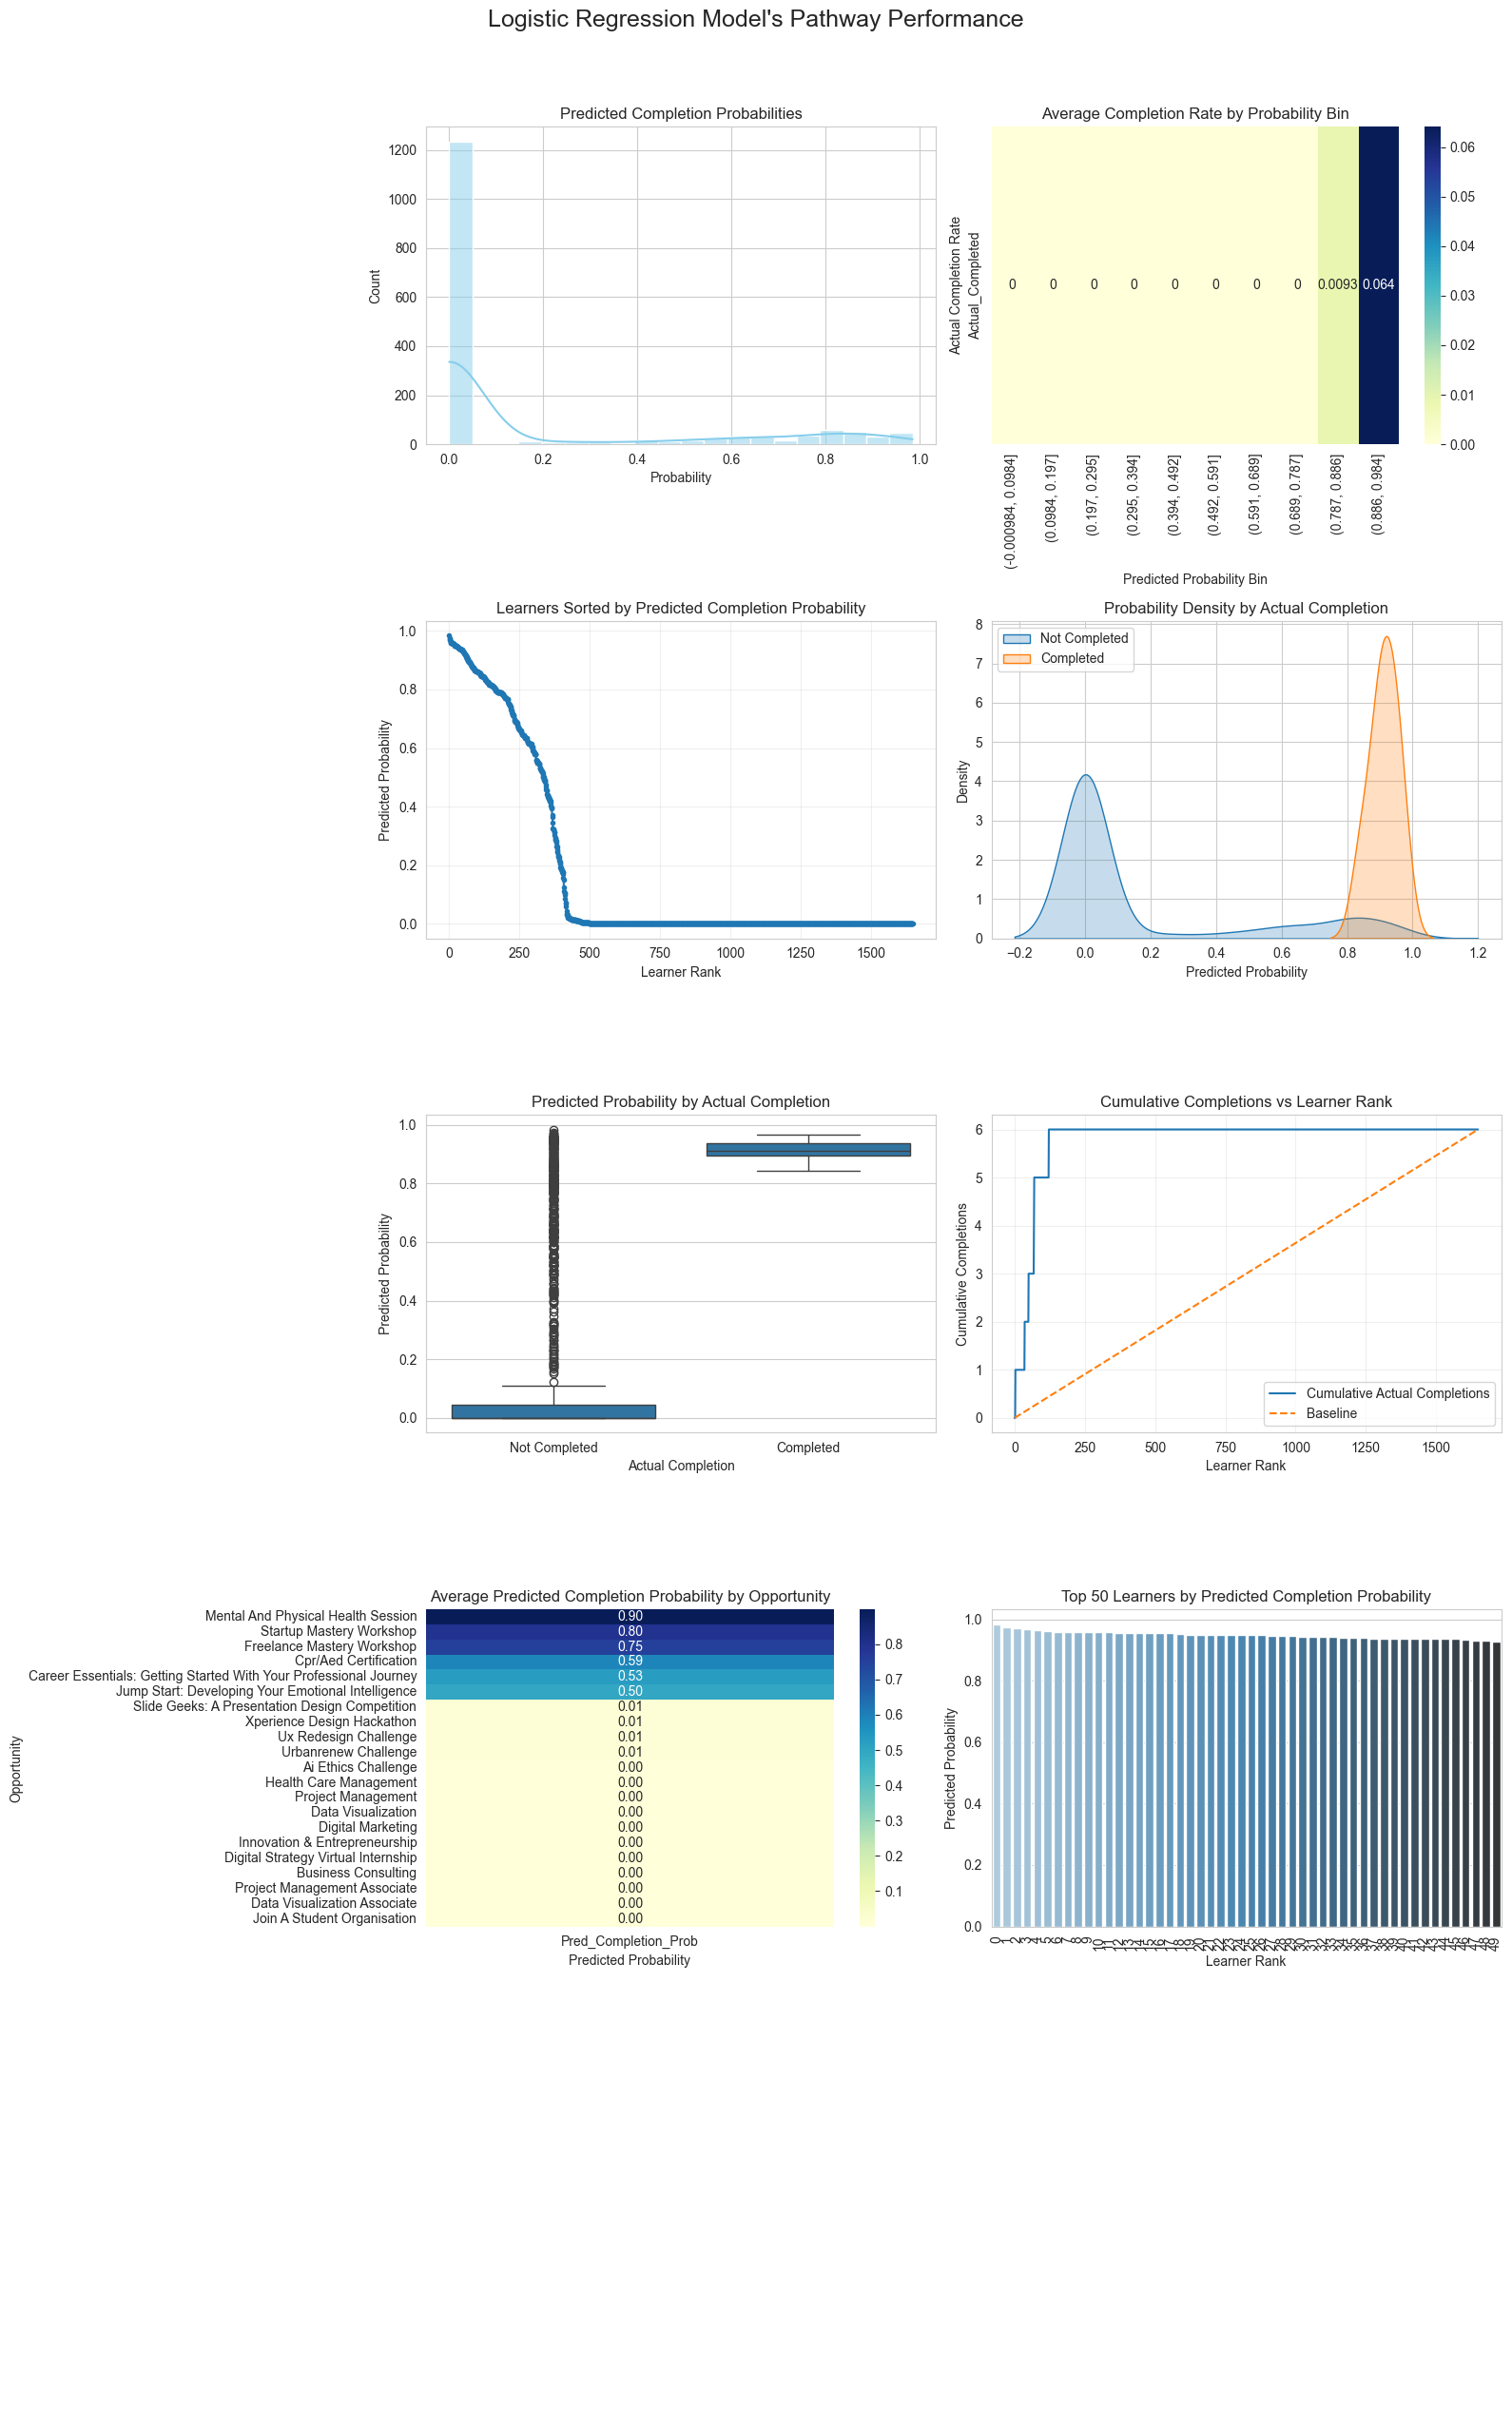

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Predict probabilities for Class 1 (Completed) ---
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of completion

# Create a DataFrame with probabilities and actual labels
df_pred = pd.DataFrame({
    'Learner_Completion_Prob': y_probs,
    'Actual_Completed': y_test
})

# Merge with Opportunity names if available
df_test = X_test.copy()
df_test['Pred_Completion_Prob'] = y_probs
if 'Opportunity Name' in df.columns:
    df_test['Opportunity_Name'] = df.loc[X_test.index, 'Opportunity Name'].values
else:
    df_test['Opportunity_Name'] = 'Unknown'

# Sort learners by probability
df_pred_sorted = df_pred.sort_values('Learner_Completion_Prob', ascending=False).reset_index(drop=True)
df_pred_sorted['Cumulative_Completed'] = df_pred_sorted['Actual_Completed'].cumsum()

# Set general style
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (12,5)})

# --- Plot all visuals in 2-column grid ---
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,25))
fig.suptitle("Logistic Regression Model's Pathway Performance", fontsize=18, y=1.02)

# 1. Histogram of Predicted Probabilities
sns.histplot(df_pred['Learner_Completion_Prob'], bins=20, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Predicted Completion Probabilities')
axes[0,0].set_xlabel('Probability')
axes[0,0].set_ylabel('Count')

# 2. Heatmap: Avg Completion Rate by Probability Bin
prob_bins = pd.cut(df_pred['Learner_Completion_Prob'], bins=10)
heatmap_data = df_pred.groupby(prob_bins)['Actual_Completed'].mean().to_frame()
sns.heatmap(heatmap_data.T, annot=True, cmap='YlGnBu', cbar=True, ax=axes[0,1])
axes[0,1].set_title('Average Completion Rate by Probability Bin')
axes[0,1].set_xlabel('Predicted Probability Bin')
axes[0,1].set_ylabel('Actual Completion Rate')

# 3. Funnel: Learners Sorted by Probability
axes[1,0].plot(df_pred_sorted['Learner_Completion_Prob'], marker='o', linestyle='-', markersize=3)
axes[1,0].set_title('Learners Sorted by Predicted Completion Probability')
axes[1,0].set_xlabel('Learner Rank')
axes[1,0].set_ylabel('Predicted Probability')
axes[1,0].grid(True, alpha=0.3)

# 4. KDE Plot by Actual Completion
sns.kdeplot(df_pred[df_pred['Actual_Completed']==0]['Learner_Completion_Prob'], label='Not Completed', fill=True, ax=axes[1,1])
sns.kdeplot(df_pred[df_pred['Actual_Completed']==1]['Learner_Completion_Prob'], label='Completed', fill=True, ax=axes[1,1])
axes[1,1].set_title('Probability Density by Actual Completion')
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()

# 5. Boxplot: Predicted Probability by Actual Completion
sns.boxplot(x='Actual_Completed', y='Learner_Completion_Prob', data=df_pred, ax=axes[2,0])
axes[2,0].set_xticks([0,1])
axes[2,0].set_xticklabels(['Not Completed','Completed'])
axes[2,0].set_title('Predicted Probability by Actual Completion')
axes[2,0].set_xlabel('Actual Completion')
axes[2,0].set_ylabel('Predicted Probability')

# 6. Cumulative Gain / Lift
axes[2,1].plot(df_pred_sorted['Cumulative_Completed'], label='Cumulative Actual Completions')
axes[2,1].plot(np.linspace(0,len(df_pred_sorted)-1,len(df_pred_sorted)),
                np.linspace(0, df_pred_sorted['Actual_Completed'].sum(), len(df_pred_sorted)),
                linestyle='--', label='Baseline')
axes[2,1].set_title('Cumulative Completions vs Learner Rank')
axes[2,1].set_xlabel('Learner Rank')
axes[2,1].set_ylabel('Cumulative Completions')
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

# 7. Heatmap: Predicted Probability by Opportunity
heatmap_data = df_test.pivot_table(index='Opportunity_Name', values='Pred_Completion_Prob', aggfunc='mean').sort_values('Pred_Completion_Prob', ascending=False)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', ax=axes[3,0])
axes[3,0].set_title('Average Predicted Completion Probability by Opportunity')
axes[3,0].set_xlabel('Predicted Probability')
axes[3,0].set_ylabel('Opportunity')

# 8. Top 50 Learners by Predicted Probability
top_50 = df_pred_sorted.head(50)
sns.barplot(x=top_50.index, y='Learner_Completion_Prob', data=top_50, palette='Blues_d', ax=axes[3,1])
axes[3,1].set_title('Top 50 Learners by Predicted Completion Probability')
axes[3,1].set_xlabel('Learner Rank')
axes[3,1].set_ylabel('Predicted Probability')
axes[3,1].tick_params(axis='x', rotation=90)

# Hide unused axes if any
axes[4,0].axis('off')
axes[4,1].axis('off')

plt.tight_layout()
plt.show()


OPTIMIZATION VISUALS

In [17]:
print(df.columns.tolist())

['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Completed', 'Age', 'Opportunity_Duration', 'Time_to_Apply', 'Gender_Male', 'Gender_Other', 'Gender_Prefer Not To Say', 'Country_Egypt', 'Country_Ethiopia', 'Country_Ghana', 'Country_India', 'Country_Kenya', 'Country_Nigeria', 'Country_Other', 'Country_Pakistan', 'Country_Rwanda', 'Country_United States', 'Opportunity Category_Course', 'Opportunity Category_Engagement', 'Opportunity Category_Event', 'Opportunity Category_Internship']


C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\3917745413.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,1], x='SignUp_Month', y='Pred_Prob', data=df_plot, palette='viridis')
C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\3917745413.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='Opportunity_Category', y='Pred_Prob', data=df_plot, palette='Set2')
C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\3917745413.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


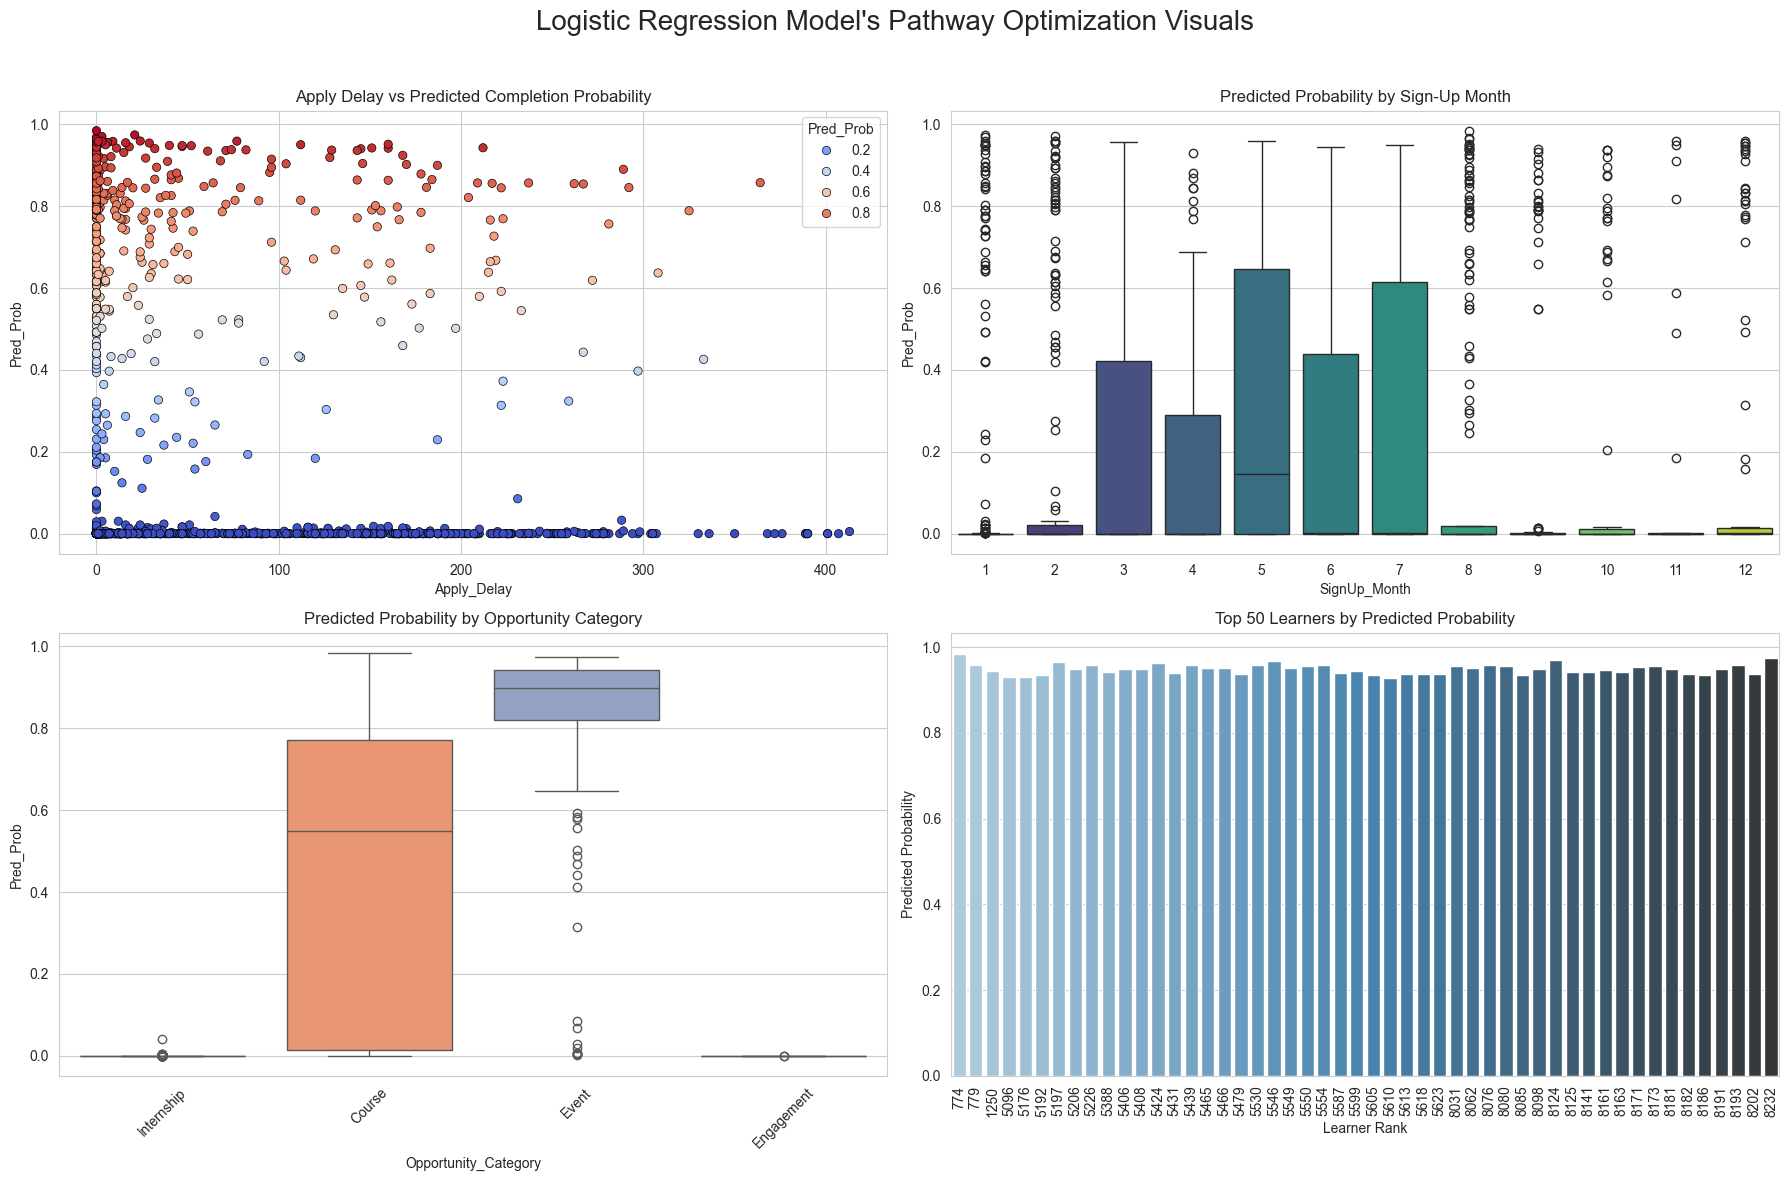

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your original dataframe, X_test_scaled is features for logistic regression, model is trained
# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Add predictions to test set copy
df_plot = X_test.copy()
df_plot['Pred_Prob'] = y_probs

# Extract month from sign-up datetime
df_plot['SignUp_Month'] = pd.to_datetime(df.loc[X_test.index, 'Learner SignUp DateTime']).dt.month

# Combine Opportunity Category one-hot columns into a single categorical for plotting
category_cols = [col for col in df.columns if col.startswith('Opportunity Category_')]
df_plot['Opportunity_Category'] = df.loc[X_test.index, category_cols].idxmax(axis=1)
df_plot['Opportunity_Category'] = df_plot['Opportunity_Category'].str.replace('Opportunity Category_', '')

# Use existing Time_to_Apply as Apply Delay
df_plot['Apply_Delay'] = df.loc[X_test.index, 'Time_to_Apply']

# --- Dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))
fig.suptitle("Logistic Regression Model's Pathway Optimization Visuals", fontsize=20)

# 1. Apply Delay vs Predicted Probability
sns.scatterplot(ax=axes[0,0], x='Apply_Delay', y='Pred_Prob', data=df_plot, hue='Pred_Prob', palette='coolwarm', edgecolor='k')
axes[0,0].set_title('Apply Delay vs Predicted Completion Probability')

# 2. SignUp Month vs Predicted Probability
sns.boxplot(ax=axes[0,1], x='SignUp_Month', y='Pred_Prob', data=df_plot, palette='viridis')
axes[0,1].set_title('Predicted Probability by Sign-Up Month')

# 3. Opportunity Category vs Predicted Probability
sns.boxplot(ax=axes[1,0], x='Opportunity_Category', y='Pred_Prob', data=df_plot, palette='Set2')
axes[1,0].set_title('Predicted Probability by Opportunity Category')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Top 50 learners by Predicted Probability
top_50 = df_plot.sort_values('Pred_Prob', ascending=False).head(50).reset_index()  # reset index to get a column for x

sns.barplot(
    ax=axes[1,1], 
    data=top_50, 
    x='index',   # the old index is now a column
    y='Pred_Prob', 
    palette='Blues_d'
)
axes[1,1].set_title('Top 50 Learners by Predicted Probability')
axes[1,1].set_xlabel('Learner Rank')
axes[1,1].set_ylabel('Predicted Probability')
axes[1,1].tick_params(axis='x', rotation=90)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


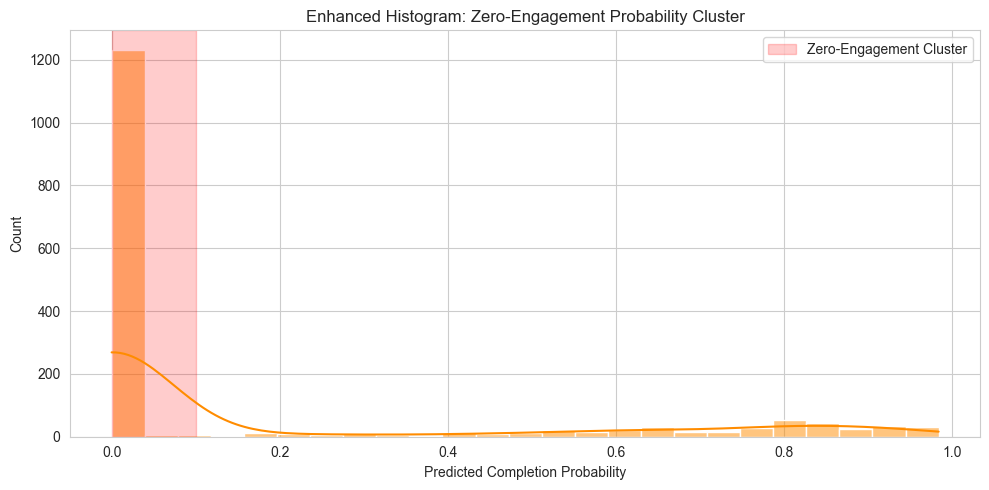

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df_pred['Learner_Completion_Prob'], bins=25, kde=True, color='darkorange')
plt.axvspan(0.0, 0.1, color='red', alpha=0.2, label='Zero-Engagement Cluster')
plt.title('Enhanced Histogram: Zero-Engagement Probability Cluster')
plt.xlabel('Predicted Completion Probability')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


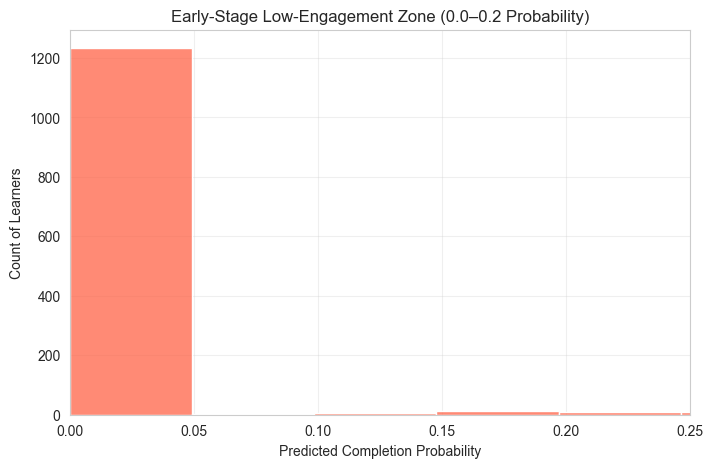

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df_pred['Learner_Completion_Prob'], bins=20, color='tomato')
plt.xlim(0, 0.25)
plt.title("Early-Stage Low-Engagement Zone (0.0–0.2 Probability)")
plt.xlabel("Predicted Completion Probability")
plt.ylabel("Count of Learners")
plt.grid(True, alpha=0.3)
plt.show()


In [21]:
df_test.columns


Index(['Age', 'Opportunity_Duration', 'Time_to_Apply', 'Gender_Male',
       'Gender_Other', 'Gender_Prefer Not To Say', 'Country_Egypt',
       'Country_Ethiopia', 'Country_Ghana', 'Country_India', 'Country_Kenya',
       'Country_Nigeria', 'Country_Other', 'Country_Pakistan',
       'Country_Rwanda', 'Country_United States',
       'Opportunity Category_Course', 'Opportunity Category_Engagement',
       'Opportunity Category_Event', 'Opportunity Category_Internship',
       'Pred_Completion_Prob', 'Opportunity_Name'],
      dtype='object')

C:\Users\sumai\AppData\Local\Temp\ipykernel_5072\3492640203.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_box, labels=list(category_map.values()))


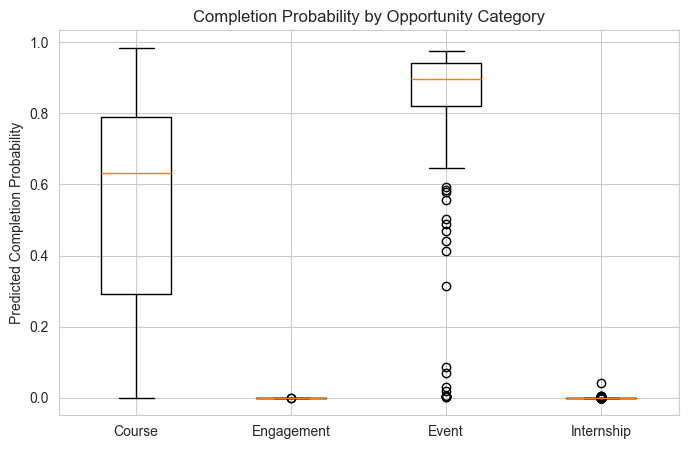

In [22]:
import seaborn as sns

category_map = {
    "Opportunity Category_Course": "Course",
    "Opportunity Category_Engagement": "Engagement",
    "Opportunity Category_Event": "Event",
    "Opportunity Category_Internship": "Internship"
}

df_box = []

for col, label in category_map.items():
    temp = df_test[df_test[col] == 1]['Pred_Completion_Prob']
    df_box.append(temp)

plt.figure(figsize=(8,5))
plt.boxplot(df_box, labels=list(category_map.values()))
plt.ylabel("Predicted Completion Probability")
plt.title("Completion Probability by Opportunity Category")
plt.show()
